<a href="https://colab.research.google.com/github/idanielnava/Potencial-Clients-Dataset/blob/main/EDA_Preparation_DENUE_(JAL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [1]:
#Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
#imports needed for Google Sheets
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth

#verification from account for reading files
auth.authenticate_user()
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#Importing dataset / Initial cleaning

In [3]:
#Reading dataset
denue = pd.read_csv('/content/drive/MyDrive/BUSINESS/DENUE paneles solares/JAL/conjunto_de_datos/denue_inegi_14_.csv', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
print('\n We have', denue.shape[1] , 'columns, however a few of them wont be necessary, others will be concatenated for better understanding from the final user \n')
print('\n Dataset shape:')
print(denue.shape)
print('\n Columns:')
print(denue.columns)
denue.head()


 We have 42 columns, however a few of them wont be necessary, others will be concatenated for better understanding from the final user 


 Dataset shape:
(378100, 42)

 Columns:
Index(['id', 'clee', 'nom_estab', 'raz_social', 'codigo_act', 'nombre_act',
       'per_ocu', 'tipo_vial', 'nom_vial', 'tipo_v_e_1', 'nom_v_e_1',
       'tipo_v_e_2', 'nom_v_e_2', 'tipo_v_e_3', 'nom_v_e_3', 'numero_ext',
       'letra_ext', 'edificio', 'edificio_e', 'numero_int', 'letra_int',
       'tipo_asent', 'nomb_asent', 'tipoCenCom', 'nom_CenCom', 'num_local',
       'cod_postal', 'cve_ent', 'entidad', 'cve_mun', 'municipio', 'cve_loc',
       'localidad', 'ageb', 'manzana', 'telefono', 'correoelec', 'www',
       'tipoUniEco', 'latitud', 'longitud', 'fecha_alta'],
      dtype='object')


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,8624390,14120112512000022000000000O3,ACUACULTORES LOS CASTRO S.C. DE R.L. DE C.V.,ACUACULTORES LOS CASTRO SC DE RL DE CV,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CIRCUITO,DE LAS CAÑAS,CALLE,...,Campestre las Palomas [Fraccionamiento] ...,6940,13,3317429415.0,ELDOTE@HOTMAIL.COM,NaN,Fijo,20.820661,-103.446726,2019-11
1,8838371,14039112511000014000000000O4,ACUACULTURA DEL PACIFICO SPR DE RL,ACUACULTURA DEL PACIFICO SPR DE RL,112511,Camaronicultura,11 a 30 personas,CALLE,PABLO VALDEZ,CALLE,...,Guadalajara ...,1170,3,NaN,CONSTRULOGA@PRODIGY.NET.MX,NaN,Fijo,20.681686,-103.329962,2019-11
2,9233864,14095112512000022000000000O7,ACUIC0LA LA CABAÑA,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,CALLE,HIDALGO SUR,CALLE,...,Teuchitlán ...,010A,8,3841193710.0,NaN,NaN,Fijo,20.683360,-103.849741,2020-04
3,8341990,14095114119000082000000000O3,ACUICOLA DE VILLA CORONA S.P.R. DE R.L.,ACUICOLA DE VILLA CORONA SPR DE RL,112512,"Piscicultura y otra acuicultura, excepto camar...",6 a 10 personas,CALLE,ALLENDE,CALLE,...,Villa Corona ...,0075,14,3331052902.0,NaN,NaN,Fijo,20.418737,-103.666418,2019-11
4,8908807,14079112512000011000000000U4,ACUÍCOLA EL DURAZNO,NaN,112512,"Piscicultura y otra acuicultura, excepto camar...",0 a 5 personas,OTRO (ESPECIFIQUE),SIN REFERENCIA,OTRO (ESPECIFIQUE),...,El Durazno ...,006A,800,NaN,NaN,NaN,Fijo,19.853656,-103.346905,2019-11


In [ ]:
#All numeric columns are actually descriptive, will transform them to string for better handling
denue['numero_ext'] = denue['numero_ext'].astype(str).str[:-2]
denue['numero_int'] = denue['numero_int'].astype(str).str[:-2]
denue['cod_postal'] = denue['cod_postal'].astype(str).str[:-2]
denue['telefono'] = denue['telefono'].astype(str).str[:-2]

In [ ]:
#Changing categorical columns to category data type
denue['nombre_act'] = denue['nombre_act'].astype('category')
denue['per_ocu'] = denue['per_ocu'].astype('category')
denue['tipoUniEco'] = denue['tipoUniEco'].astype('category')

In [ ]:
#Building address columns 
denue['Direccion']= denue['tipo_vial'] + ' ' + denue['nom_vial'] + ' ' + denue['numero_ext'] + '. ' + denue['tipo_asent'] + ', ' + denue['nomb_asent']
denue['Entre calles'] = denue['nom_v_e_1'] + ' y ' + denue['nom_v_e_2']

In [ ]:
#Dropping unnecesary columns
denue.drop(['tipo_vial', 'nom_vial', 'numero_ext', 'nom_v_e_1', 'nom_v_e_2', 'numero_int', 'tipo_asent', 'nomb_asent','clee', 'codigo_act', 'tipo_v_e_1', 'tipo_v_e_2', 'tipo_v_e_3', 'tipo_v_e_3', 'nom_v_e_3', 'edificio', 'edificio_e', 'letra_int', 'nom_CenCom', 'num_local', 'cve_ent', 'entidad', 'manzana', 'latitud', 'longitud', 'cve_mun', 'cve_loc', 'tipoCenCom', 'letra_ext'], axis=1, inplace=True)

In [ ]:
#Cleaning per_ocu column from unnecesary substrings, will only keep the amount of people working at each business
denue['per_ocu'] = denue['per_ocu'].str.replace(' a ','-')
denue['per_ocu'] = denue['per_ocu'].str.replace('personas','')

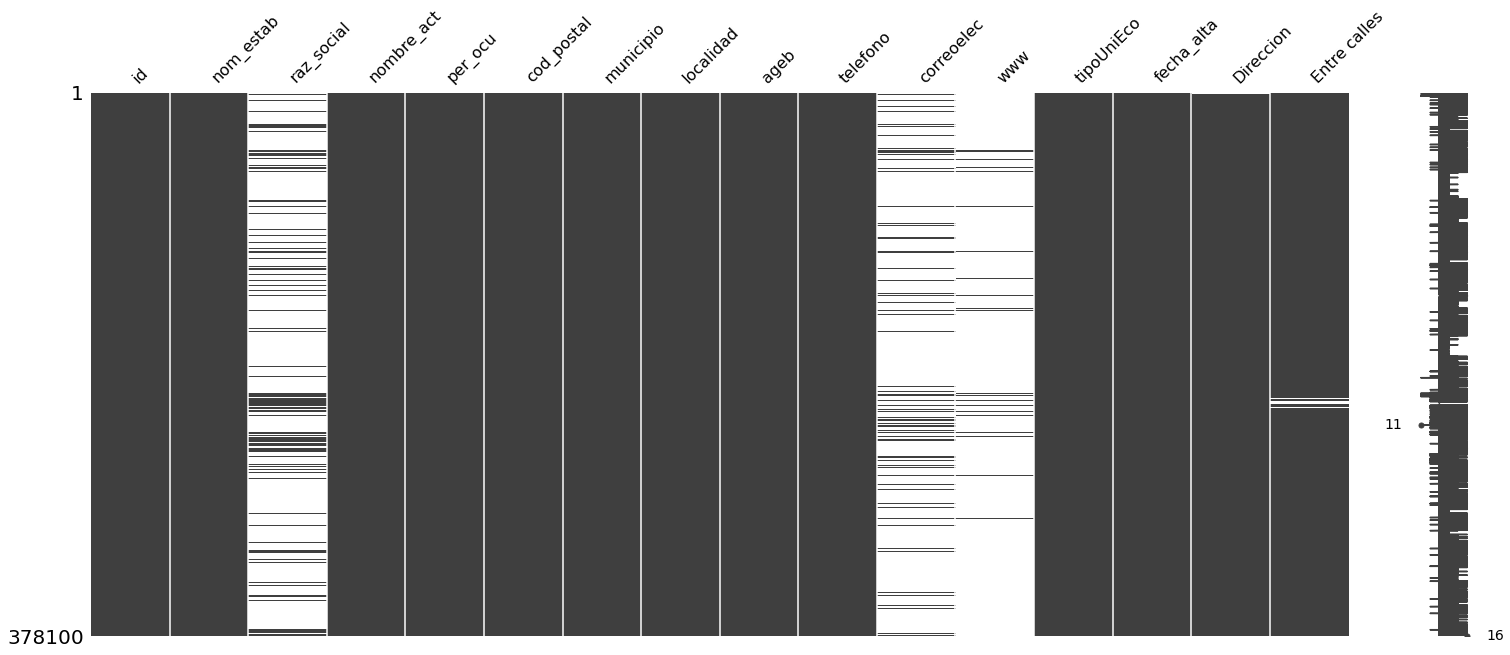

In [ ]:
#Visualy checking duplicate values
msno.matrix(denue)
plt.show()

In [ ]:
#Checking whether there are duplicate and null values in the dataset
duplicate_rows_df = denue[denue.duplicated()]
print('Number of duplicate rows: ', duplicate_rows_df.shape)
print('\nLocation of null values:')
print(denue.isnull().sum())

Number of duplicate rows:  (0, 16)

Location of null values:
id                   0
nom_estab            0
raz_social      306666
nombre_act           0
per_ocu              0
cod_postal           0
municipio            0
localidad            0
ageb                 0
telefono             0
correoelec      328401
www             355147
tipoUniEco           0
fecha_alta           0
Direccion         1158
Entre calles      4272
dtype: int64


In [ ]:
#Renaming columns for better understanding
denue.rename(columns= {'nom_estab':'Nombre', 'raz_social':'Razon Social', 'nombre_act':'Tipo Actividad', 'per_ocu':'Empleados', 'cod_postal':'CP', 'correoelec':'email', 'www':'Sitio Web', 'tipoUniEco':'Tipo Establecimiento', 'municipio':'Municipio', 'localidad':'Localidad', 'telefono':'Telefono'}, inplace= True)

In [ ]:
#We have almost 400k records, will create a column of regions based on "Municipio" in order to make it easier for the final user to handle that amount of records
altos_norte = ['Lagos de Moreno', 'San Juan de los Lagos', 'Encarnación de Díaz', 'Villa Hidalgo', 'Teocaltiche', 'Ojuelos de Jalisco', 'Unión de San Antonio', 'San Diego de Alejandría']
altos_sur = ['Tepatitlán de Morelos', 'Arandas', 'San Miguel el Alto', 'Jalostotitlán', 'Yahualica de González Gallo', 'Acatic', 'San Julián', 'San Ignacio Cerro Gordo', 'Jesús María', 'Valle de Guadalupe', 'Mexticacán', 'Cañadas de Obregón']
centro = ['Guadalajara', 'Zapopan', 'San Pedro Tlaquepaque', 'Tonalá', 'Tlajomulco de Zúñiga', 'El Salto', 'Zapotlanejo', 'Ixtlahuacán de los Membrillos', 'Ixtlahuacán del Río', 'Cuquío', 'Juanacatlán', 'San Cristóbal de la Barranca']
cienega = ['Ocotlán', 'La Barca', 'Atotonilco el Alto', 'Poncitlán', 'Ayotlán', 'Jamay', 'Tototlán', 'Degollado', 'Zapotlán del Rey']
costa_sur = ['Cihuatlán', 'Tomatlán', 'La Huerta', 'Casimiro Castillo', 'Villa Purificación', 'Cuautitlán de García Barragán']
costa_sierra = ['Puerto Vallarta', 'Talpa de Allende', 'Mascota', 'Cabo Corrientes', 'Atenguillo', 'Guachinango', 'Mixtlán', 'San Sebastián del Oeste']
lagunas = ['Sayula', 'Zacoalco de Torres', 'San Martín Hidalgo', 'Cocula', 'Acatlán de Juárez', 'Villa Corona', 'Tapalpa', 'Atoyac', 'Atemajac de Brizuela', 'Teocuitatlán de Corona', 'Amacueca', 'Techaluta de Montenegro']
norte = ['Colotlán', 'Huejuquilla el Alto', 'Huejúcar', 'Villa Guerrero', 'Mezquitic', 'San Martín de Bolaños', 'Santa María de los Ángeles', 'Bolaños', 'Totatiche', 'Chimaltitán']
amula = ['Autlán de Navarro', 'El Grullo', 'Tecolotlán', 'Unión de Tula', 'Ayutla', 'Tenamaxtlán', 'Tonaya', 'Juchitlán', 'Chiquilistlán', 'El Limón','Tuxcacuesco', 'Cuautla', 'Atengo', 'Ejutla']
sur = [ 'Zapotlán el Grande', 'Tuxpan', 'Tamazula de Gordiano', 'Zapotiltic', 'Tecalitlán', 'Gómez Farías', 'Pihuamo', 'San Gabriel', 'Tonila', 'Zapotitlán de Vadillo', 'Tolimán', 'Jilotlán de los Dolores']
sureste = [ 'Chapala', 'Jocotepec', 'Mazamitla', 'Tizapán el Alto', 'Valle de Juárez', 'Concepción de Buenos Aires', 'Tuxcueca', 'La Manzanilla de la Paz', 'Quitupan', 'Santa María del Oro']
valles = [ 'Tala', 'Ameca', 'Tequila', 'Ahualulco de Mercado', 'Etzatlán', 'Magdalena', 'El Arenal', 'Amatitán', 'San Juanito de Escobedo', 'Teuchitlán', 'Hostotipaquillo', 'San Marcos']

denue.loc[denue['Municipio'].isin(altos_norte), 'Region'] = 'Altos Norte'
denue.loc[denue['Municipio'].isin(altos_sur), 'Region'] = 'Altos Sur'
denue.loc[denue['Municipio'].isin(centro), 'Region'] = 'Centro'
denue.loc[denue['Municipio'].isin(cienega), 'Region'] = 'Cienega'
denue.loc[denue['Municipio'].isin(costa_sur), 'Region'] = 'Costa Sur'
denue.loc[denue['Municipio'].isin(costa_sierra), 'Region'] = 'Costa-Sierra Occidental'
denue.loc[denue['Municipio'].isin(lagunas), 'Region'] = 'Lagunas'
denue.loc[denue['Municipio'].isin(norte), 'Region'] = 'Norte'
denue.loc[denue['Municipio'].isin(amula), 'Region'] = 'Sierra de Amula'
denue.loc[denue['Municipio'].isin(sur), 'Region'] = 'Sur'
denue.loc[denue['Municipio'].isin(sureste), 'Region'] = 'Sureste'
denue.loc[denue['Municipio'].isin(valles), 'Region'] = 'Valles'

print('Businesses in Jalisco are distributed in 12 regions as follows:')
print(denue['Region'].value_counts(normalize= True).mul(100).round(1).astype(str) + '%')
denue['Region'] = denue['Region'].astype('category')

Businesses in Jalisco are distributed in 12 regions as follows:
Centro                     59.5%
Altos Sur                   5.8%
Cienega                     5.6%
Altos Norte                 5.4%
Costa-Sierra Occidental     5.2%
Valles                      4.0%
Sur                         4.0%
Lagunas                     2.7%
Sierra de Amula             2.5%
Sureste                     2.2%
Costa Sur                   2.0%
Norte                       1.0%
Name: Region, dtype: object


# Data Exploration

In [ ]:
#Quick look at categorical variables
denue.describe(include=['object', 'category'])

,Nombre,Razon Social,Tipo Actividad,Empleados,CP,Municipio,Localidad,ageb,Telefono,email,Sitio Web,Tipo Establecimiento,fecha_alta,Direccion,Entre calles,Region
count,378100,71434,378100,378100,378100,378100,378100,378100,378100,49699,22953,378100,378100,376942,373828,378100
unique,243711,41374,927,7,1416,125,1183,2224,108954,43394,14788,2,19,284417,75012,12
top,TIENDA DE ABARROTES,SECRETARÍA DE EDUCACIÓN PÚBLICA,"Comercio al por menor en tiendas de abarrotes,...",0-5,44360,Guadalajara,Guadalajara ...,1378,n,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,2010-07,"CALLE DIONISIO RODRIGUEZ 52. COLONIA, CENTRO",NINGUNO y NINGUNO,Centro
freq,4798,1295,37494,321181,5661,99745,99745,4055,263569,1029,1029,370373,141036,1002,6269,224973


In [ ]:
#Inspecting stablished/semi stablished business
print(denue['Tipo Establecimiento'].value_counts(normalize= True).mul(100).round(1).astype(str) + '%')
print('\n 2% of records represent semi stablished businesess, will ignore that 2% of information because we can only work with fully stablished businesess')

Fijo        98.0%
Semifijo     2.0%
Name: Tipo Establecimiento, dtype: object

 2% of records represent semi stablished businesess, will ignore that 2% of information because we can only work with fully stablished businesess


In [ ]:
#Filtering out semi stablished business
denue = denue[denue['Tipo Establecimiento'] == 'Fijo']
denue.drop(['Tipo Establecimiento'], axis=1, inplace=True)
denue.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(370373, 16)

92% of businesses employ less than 11 people, this is expected acording to the industries reality in the region 

    Employees  share
0        0-5    84.7
1       6-10     7.9
2      11-30     5.1
3      31-50     1.0
4     51-100     0.6
5    101-250     0.4
6  251 y más     0.3


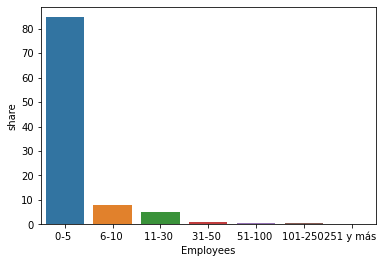

In [ ]:
#Inspecting average amount of employees by business
amount_employees= denue['Empleados'].value_counts(normalize= True).mul(100).round(1).rename_axis('Employees').reset_index(name='share')
print('92% of businesses employ less than 11 people, this is expected acording to the industries reality in the region \n')
sns.barplot(data=amount_employees, x= 'Employees', y= 'share')
print(amount_employees)


In [ ]:
#Amount of records by municipio
denue['Municipio'].value_counts(normalize= True).mul(100).round(2).astype(str) + '%'

Guadalajara                      26.4%
Zapopan                         13.88%
San Pedro Tlaquepaque            6.48%
Tonalá                           5.12%
Puerto Vallarta                  4.32%
                                 ...  
Atengo                           0.03%
Ejutla                           0.03%
San Cristóbal de la Barranca     0.02%
Chimaltitán                      0.02%
Santa María del Oro              0.02%
Name: Municipio, Length: 125, dtype: object

In [ ]:
#Amount of giros 
Actividad_Share = denue['Tipo Actividad'].value_counts(normalize= True).mul(100).round(2).astype(str) + '%'
print('Top 20 actividades por cantidad de comercios: \n')
print(Actividad_Share.head(20))

Top 20 actividades por cantidad de comercios: 

Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas                                     10.09%
Salones y clínicas de belleza y peluquerías                                                                    4.97%
Comercio al por menor de ropa, excepto de bebé y lencería                                                      3.57%
Restaurantes con servicio de preparación de tacos y tortas                                                     2.92%
Comercio al por menor de artículos de papelería                                                                2.04%
Restaurantes con servicio de preparación de antojitos                                                          1.76%
Reparación mecánica en general de automóviles y camiones                                                       1.53%
Comercio al por menor de frutas y verduras frescas                                                             1.45%
Cafeterías, fuen

# Export to an Excel file

In [ ]:
#Reordering columns for for export


,id,Nombre,Razon Social,Tipo Actividad,Empleados,Direccion,Entre calles,CP,Municipio,Localidad,Region,ageb,Telefono,email,Sitio Web,fecha_alta
0,8624390,ACUACULTORES LOS CASTRO S.C. DE R.L. DE C.V.,ACUACULTORES LOS CASTRO SC DE RL DE CV,"Piscicultura y otra acuicultura, excepto camar...",0-5,"CIRCUITO DE LAS CAÑAS 71. FRACCIONAMIENTO, FRA...",MOLINOS DEL VALLE y AV DE LA MANCHA,45200,Zapopan,Campestre las Palomas [Fraccionamiento] ...,Centro,6940,3317429415,ELDOTE@HOTMAIL.COM,NaN,2019-11
1,8838371,ACUACULTURA DEL PACIFICO SPR DE RL,ACUACULTURA DEL PACIFICO SPR DE RL,Camaronicultura,11-30,"CALLE PABLO VALDEZ 606. COLONIA, LA PERLA",PEDRO A. GALVAN y PEDRO TAMEZ,44360,Guadalajara,Guadalajara ...,Centro,1170,n,CONSTRULOGA@PRODIGY.NET.MX,NaN,2019-11
2,9233864,ACUIC0LA LA CABAÑA,NaN,"Piscicultura y otra acuicultura, excepto camar...",0-5,"CALLE HIDALGO SUR 66. LOCALIDAD, TEHUCHOTLAN",16 de Septiembre Poniente y 5 de Mayo Poniente,46760,Teuchitlán,Teuchitlán ...,Valles,010A,3841193710,NaN,NaN,2020-04
3,8341990,ACUICOLA DE VILLA CORONA S.P.R. DE R.L.,ACUICOLA DE VILLA CORONA SPR DE RL,"Piscicultura y otra acuicultura, excepto camar...",6-10,"CALLE ALLENDE 76. COLONIA, VILLA CORONA CENTRO",MATAMOROS y FRANCISCO MARQUEZ,45730,Villa Corona,Villa Corona ...,Lagunas,0075,3331052902,NaN,NaN,2019-11
4,8908807,ACUÍCOLA EL DURAZNO,NaN,"Piscicultura y otra acuicultura, excepto camar...",0-5,OTRO (ESPECIFIQUE) SIN REFERENCIA n. LOCALIDAD...,NaN,49150,Gómez Farías,El Durazno ...,Sur,006A,n,NaN,NaN,2019-11


In [ ]:
#Since Centro region accounts for almost 60% of all records, will save this region into a first excel tab, and the rest of the regions to the second tab
sheet1 = denue[denue['Region'] == 'Centro']
sheet2 = denue[denue['Region'] != 'Centro']

In [ ]:
#Write Excel file
with pd.ExcelWriter("/content/drive/MyDrive/BUSINESS/DENUE paneles solares/JAL/Contactos_Jalisco.xlsx") as writer:
    sheet1.to_excel(writer, sheet_name="Centro")  
    sheet2.to_excel(writer, sheet_name="Otras regiones")  